## World Happiness Report Project

### Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 


### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

### Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

https://github.com/dsrscientist/DSData


In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
# Checking The Dimension of th e dataset

df.shape

(158, 12)

The dataset contains 158 rows and 12 columns.

### Statistical Summary

In [4]:
# Some more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we can see there are no null values present in this dataset. This gives the brief about the dataset which includes indexing type,columns type, no null values and memory usage. There are three different types of data (int64 and float64,object) present in the dataset.

There are two columns having categorical data and we can change it by using Encoding technique

In [5]:
# let's check the descriptive statistics of the variables

df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The choice of Dystopia as a benchmark permits every real country to have a positive (or at least zero) contribution from each of the six factors.

### Exploratory Data Analysis(EDA:)

In [6]:
# Checking  of missing values

df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
# Checking the total number of missing values

df.isnull().sum().sum()

0

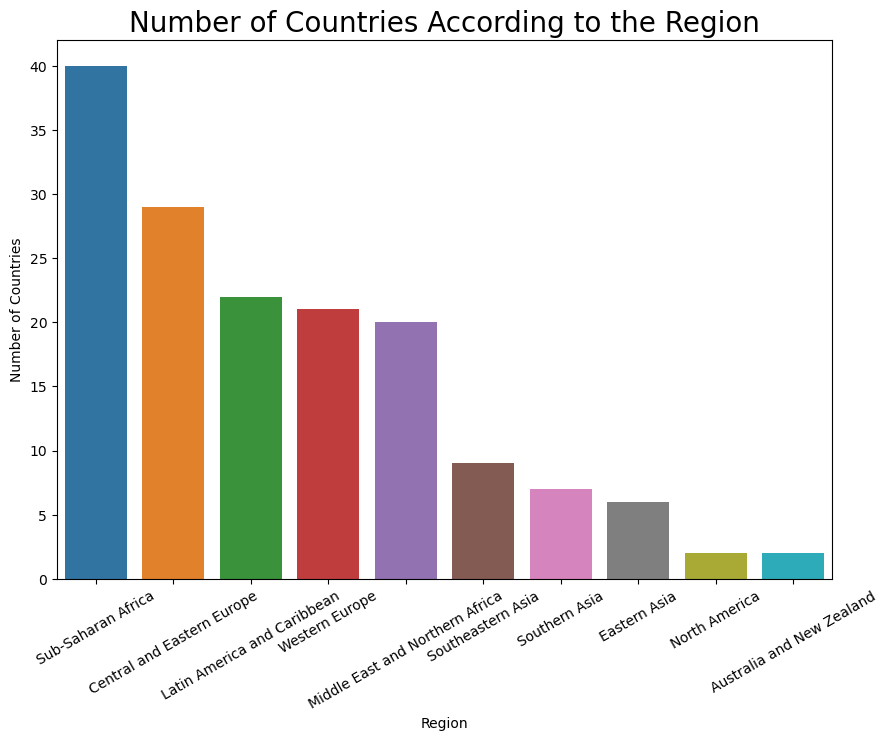

In [8]:
# For checking the number of countries according to region using bar plot

data=df.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=data.index,y=data.values)
plt.xlabel('Region')
plt.xticks(rotation = 30)
plt.ylabel('Number of Countries')
plt.title('Number of Countries According to the Region', fontsize = 20)
plt.show()

Sub-Saharan Africa region has more countries whereas North America, Austraila and New Zealand have the lowest countries

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

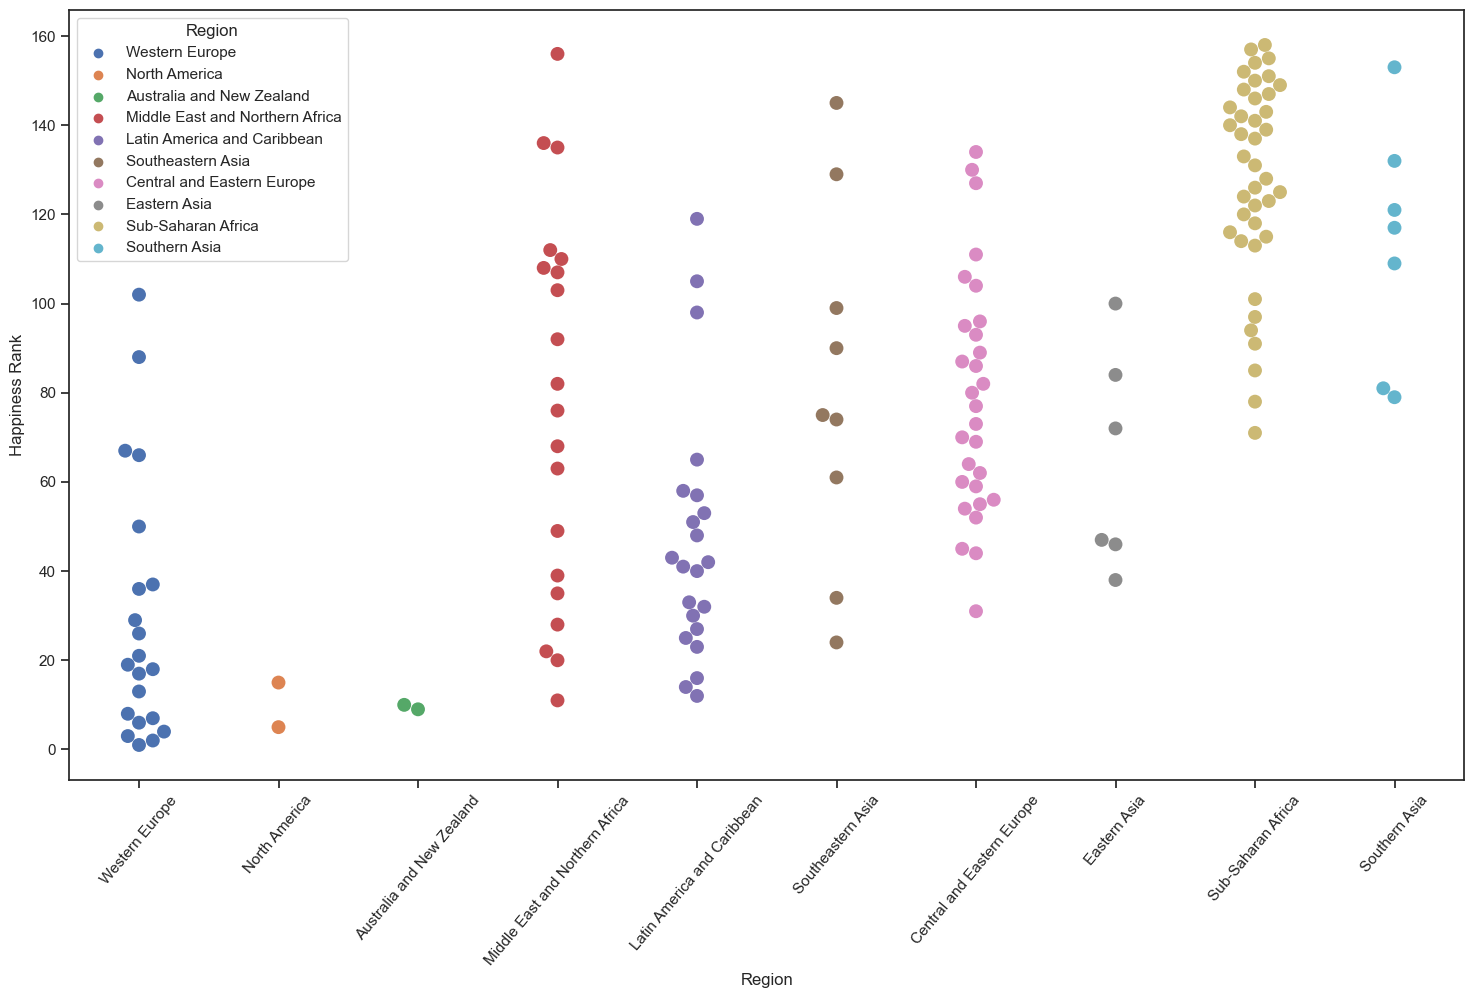

In [8]:
# Checking happiness rank according to region using swarm plot

sns.set(style='ticks')
plt.figure(figsize=(18,10))
sns.swarmplot(x="Region", y="Happiness Rank", data=df,size=10,hue='Region')
plt.xticks(rotation=50)

<Axes: xlabel='Dystopia Residual'>

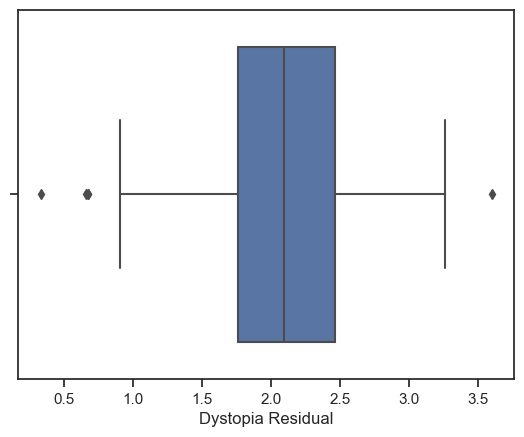

In [9]:
# Checking the distribution of Dystopia Residual using Box plot

sns.boxplot(x='Dystopia Residual',data=df)

<Axes: xlabel='Happiness Score'>

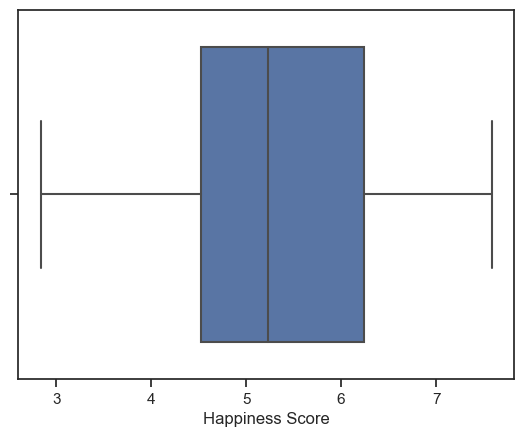

In [10]:
# Checking the distribution of Happiness Score

sns.boxplot(x='Happiness Score',data=df)

#### Checking relationship of 2 columns using scatter plot

<Axes: xlabel='Dystopia Residual', ylabel='Happiness Score'>

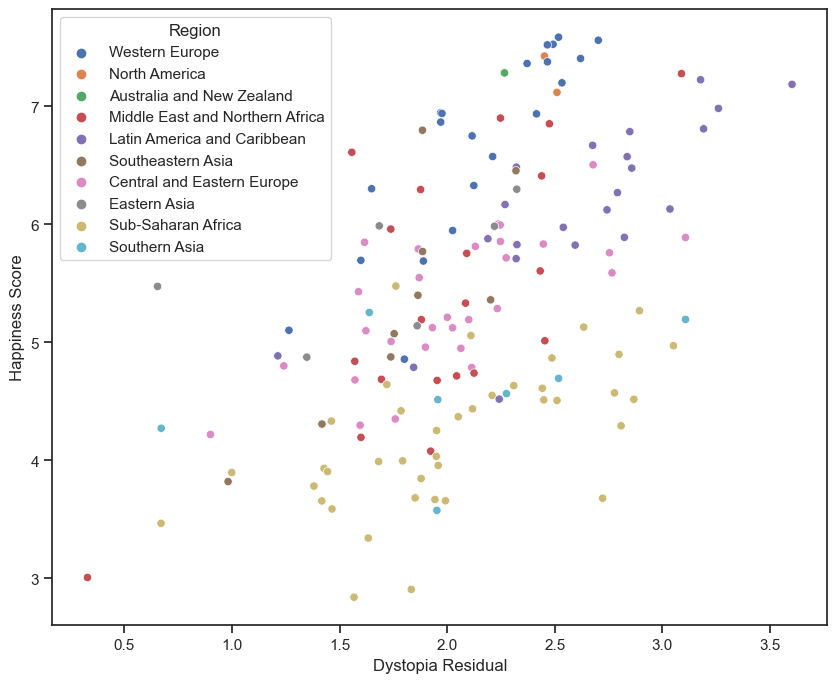

In [11]:
# Checking relationship between Dystopia Residual and Happiness Score

plt.figure(figsize=(10,8))
sns.scatterplot(x='Dystopia Residual',y='Happiness Score',data=df,hue='Region')

<Axes: xlabel='Family', ylabel='Happiness Score'>

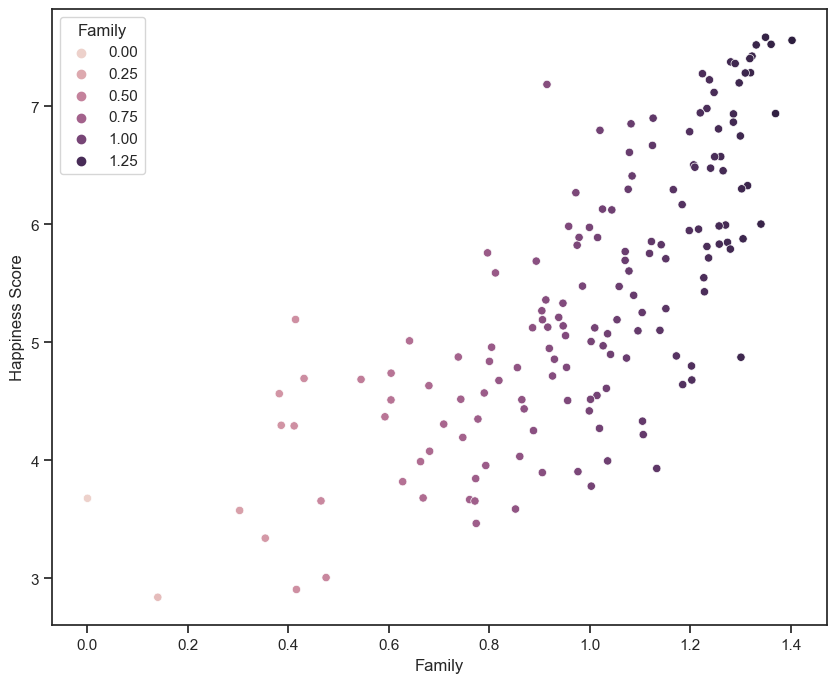

In [12]:
# Checking relationship between Family and Happiness Score

plt.figure(figsize=(10,8))
sns.scatterplot(x='Family',y='Happiness Score',data=df,hue='Family')

<Axes: xlabel='Generosity', ylabel='Happiness Score'>

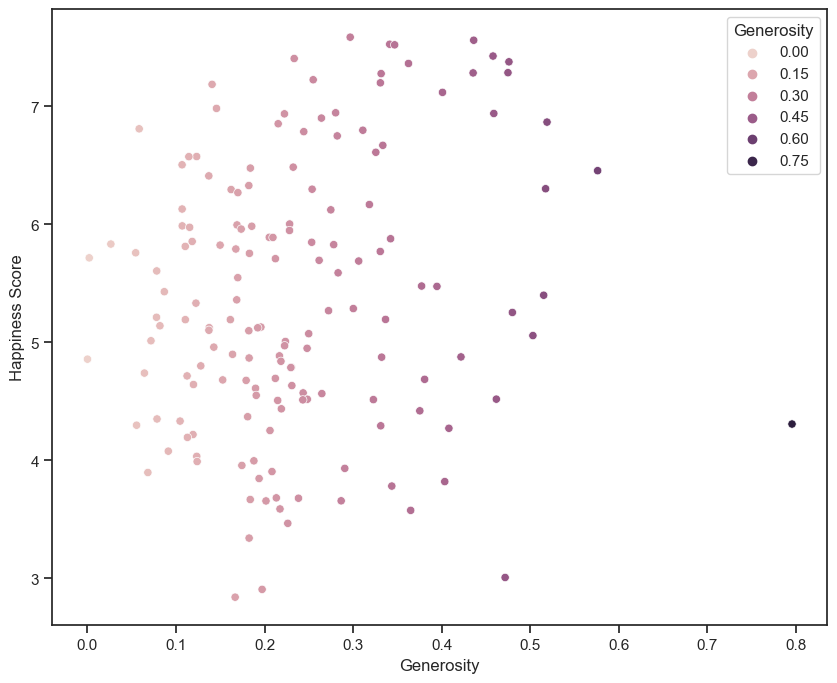

In [13]:
# Checking relationship between Generosity and Happiness Score

plt.figure(figsize=(10,8))
sns.scatterplot(x='Generosity',y='Happiness Score',data=df,hue='Generosity')

The relationship between the Happiness Score and other columns are not in linear due to the presence of skewness

In [14]:
# Checking correlation of the dataset

corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


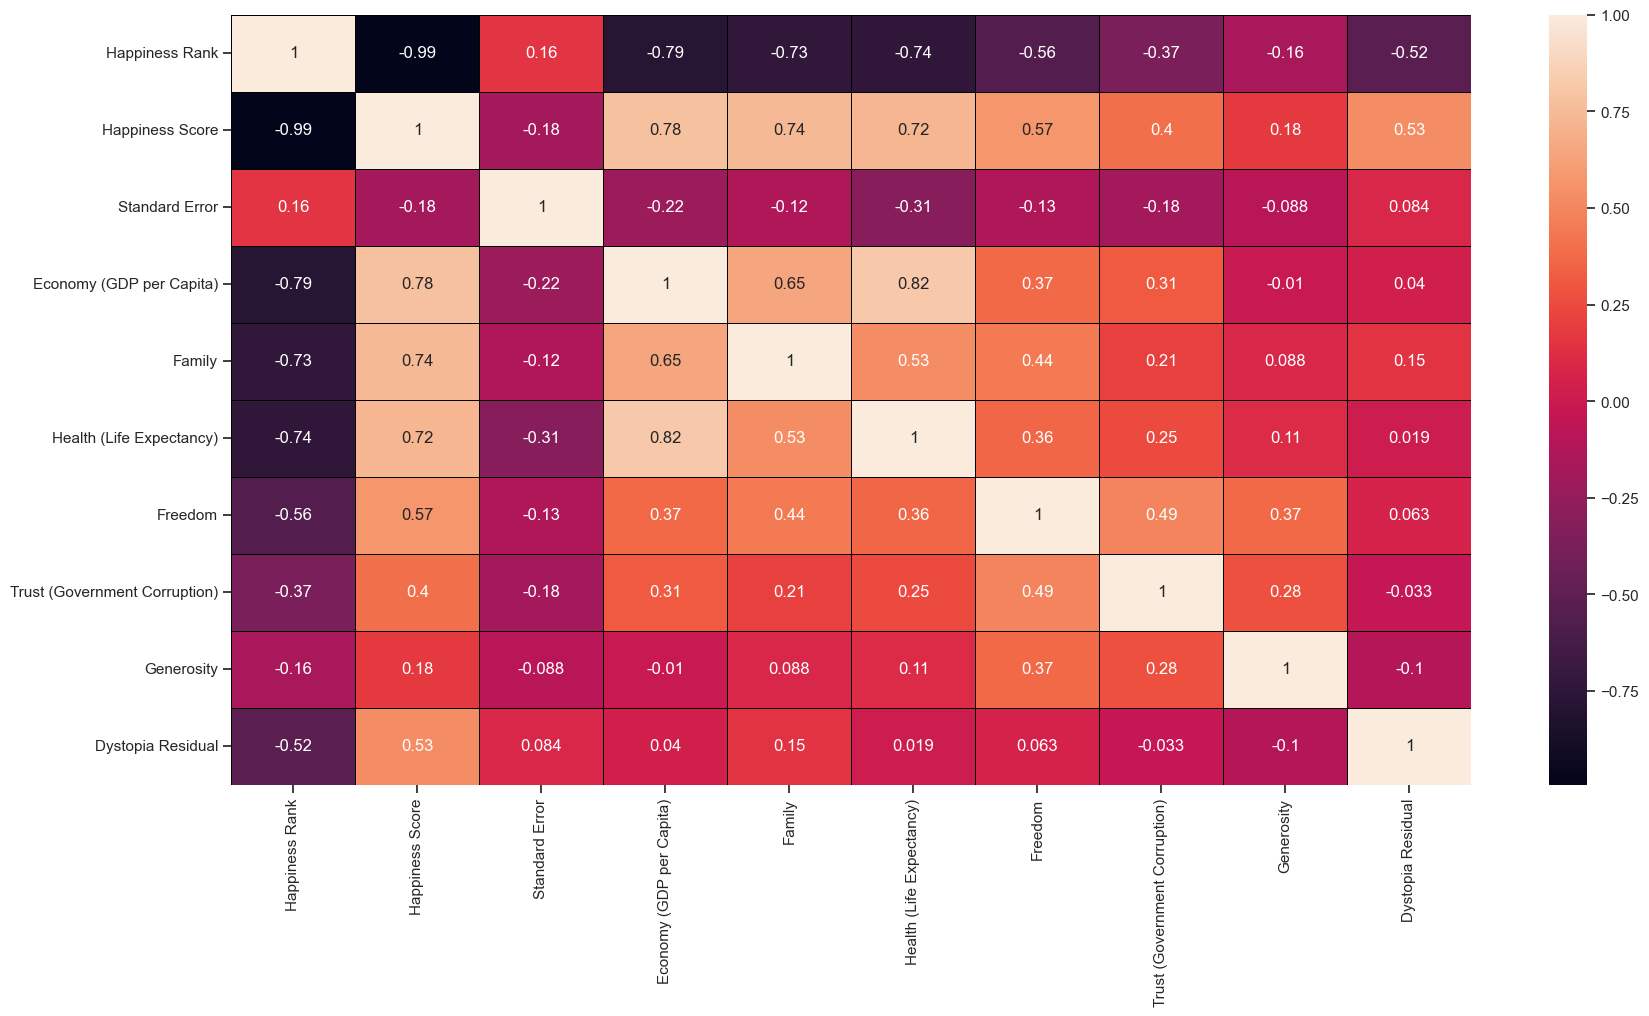

In [15]:
# Plotting heatmap to understand the visualization of correlation

plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

Observations:

1.Most of the columns are positively correlated

2.Happiness rank is the column which is highly negative correlated and highest value is nearly -99%

3.Highly positive correlated column is Happiness Score and maximum positive value is 78% with Economy column

4.Positively correlated columns have high impact with the target variable, whereas negatively correlated column have zero or less impact with the target variable

### Encoding the Data with Label Encoder converting all the catagorical data into numeric values

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'].astype(str))
df['Region']=le.fit_transform(df['Region'].astype(str))

In [18]:
# Checking the datatype of the columns after encoding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

In [17]:
# Checking out the dataset after encoding

df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
# let's check the descriptive statistics of the variables

df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [19]:
# Checking skewness

df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Columns like Standard Error, Family, Trust and Generosity are having large skewness

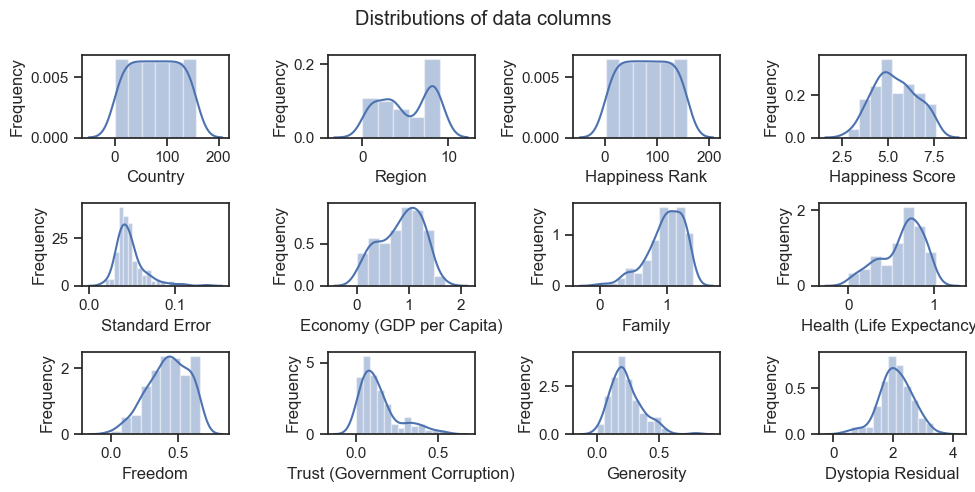

In [20]:
# Checking distribution of data using distribution plot

plt.figure(figsize=(10,5))
plt.suptitle('Distributions of data columns')

for i, col in enumerate(df.describe().columns):
    plt.subplot(3,4, i+1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()

Nearly most of the columns are not normally distributed and it is due to the presence of outliers and we need to handle them

### Checking outliers

<Axes: >

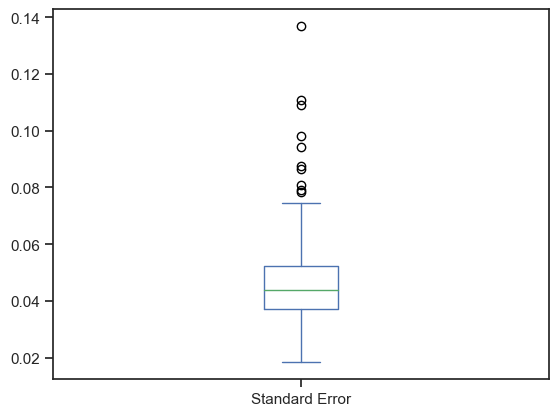

In [21]:
# Plotting boxplot for checking outliers

df['Standard Error'].plot.box()

<Axes: >

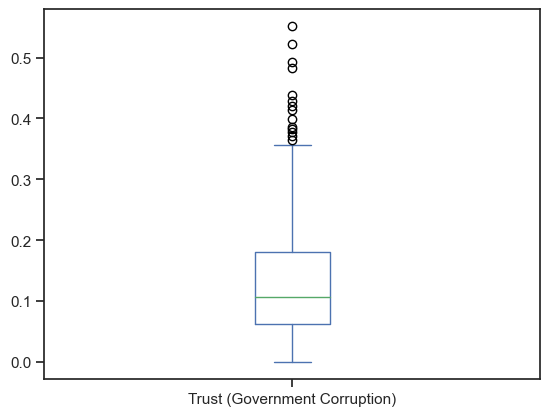

In [22]:
# Plotting boxplot for checking outliers

df['Trust (Government Corruption)'].plot.box()

<Axes: >

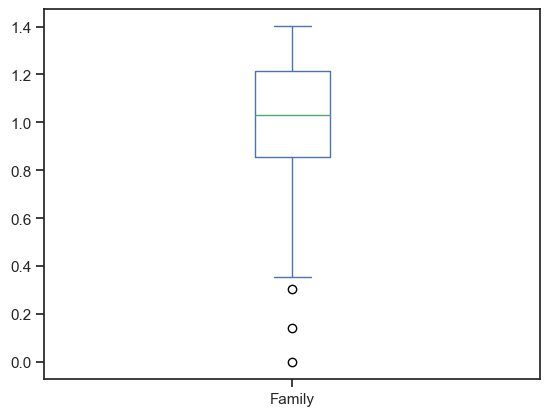

In [23]:
# Plotting boxplot for checking outliers

df['Family'].plot.box()

<Axes: >

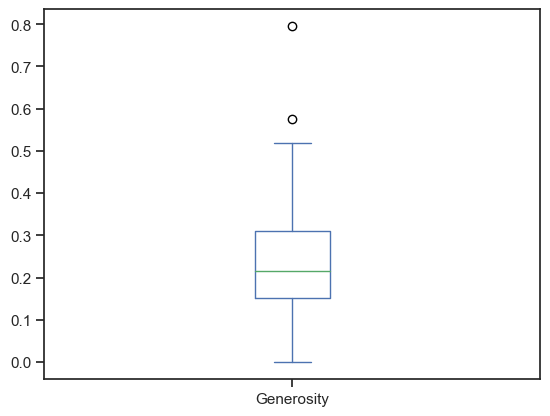

In [24]:
# Plotting boxplot for checking outliers

df['Generosity'].plot.box()

There are more outliers present and we can handle them by using z-score

### Handling outliers using z-score

In [25]:
from scipy.stats import zscore
import numpy as np

In [26]:
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3            #setting up a threshold
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))

In [27]:
# Removing outliers

df_new=df[(z<3).all(axis=1)]
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [28]:
# Original dataset dimensions

df.shape   

(158, 12)

In [29]:
# New dataset dimensions

df_new.shape   

(149, 12)

We can see that 9 rows had outliers and it has been removed from the dataset using z-score method

In [30]:
# Percentage loss of data after removing outliers

percentage_loss=((9)/158)*100
print('Percentage of loss:',percentage_loss)

Percentage of loss: 5.69620253164557


Nearly 5 percent of data has been lost from the data due to removal of outliers

### Preparing dataset for model training
Splitting x(Independent variables) and y(Target variable/Dependent variables)

In [31]:
x=df_new.drop('Happiness Score',axis=1)   # Independent variables

y=df_new['Happiness Score']              # Dependent or Target Variable

In [32]:
# Checking x data
x.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [33]:
# Checking y data after splitting
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [34]:
# Removing skewness using power transform

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #Transforming x data

### Scaling the model
Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [35]:
# Scaling the dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.19015533,  1.23451354, -2.05151352, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354, -1.99584442, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354, -1.94524081, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577,  1.53128908, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966,  1.56626337, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966,  1.60111233, ..., -0.14727363,
        -0.17248608, -0.55359236]])

### Building the model

In [36]:
# Importing required metrices and model for the dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [37]:
# Finding the best random state and accuracy

best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)
        print("**********************************************************************************************************")
        print('\n\n')

At random state 28 ,the model performs well
Training r2_score is:  99.61576961906104
Testing r2_score is:  99.62182248377104
**********************************************************************************************************



At random state 108 ,the model performs well
Training r2_score is:  99.59800035998961
Testing r2_score is:  99.59893552676304
**********************************************************************************************************



At random state 215 ,the model performs well
Training r2_score is:  99.59936228912677
Testing r2_score is:  99.59961833822888
**********************************************************************************************************



At random state 347 ,the model performs well
Training r2_score is:  99.60067265349899
Testing r2_score is:  99.60342290610498
**********************************************************************************************************



At random state 470 ,the model performs well
Training r2_

We can see that at random state=935, it is giving excellent training and testing r2_scores so that we can create the train_test_split using this random state

In [38]:
# Creating train_test_split using best random_state

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=935,test_size=.20)

### Finding the best model

In [39]:
# Importing required metrics

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [40]:
# Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print('For Linear Regression: \n')
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Linear Regression: 

Accuracy:  99.62434958975948
Cross Validation score:  99.33729446341324
Difference:  0.2870551263462362
Mean Squared Error:  0.0045893613149368935
Root Mean Squared Error:  0.06774482500484368


In [41]:
# Random Forest Regressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print('For Random Forest Regressor: \n')
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Random Forest Regressor: 

Accuracy:  99.89107708480222
Cross Validation score:  99.29734461167502
Difference:  0.5937324731272176
Mean Squared Error:  0.0013307229266666246
Root Mean Squared Error:  0.0364790751893003


In [42]:
# Support Vector Regressor

svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SVR(),x_train,y_train,cv=5).mean()
print('For Support Vector Regressor: \n')
print('Accuracy: ',r2score*100)
print('Cross Validation score: ',cvscore*100)
print('Difference: ',(r2score-cvscore)*100)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Support Vector Regressor: 

Accuracy:  93.98952763617757
Cross Validation score:  93.73438826583511
Difference:  0.2551393703424609
Mean Squared Error:  0.07343058492432392
Root Mean Squared Error:  0.27098078331188713


### Gradient Boosting Regressor

In [43]:
# lets apply regression to datasets

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('Accuracy correponding to best random state',final_r_state,'is',max_r_score*100)
    return final_r_state

In [44]:
# for getting best set of parameters, we will use GridSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,100]} 
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x_train,y_train)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [45]:
# Using the best learning rate and n_estimator value for finding r2_score

gbr=GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 100)
r_state=maxr2_score(gbr,x,y)


Accuracy correponding to best random state 97 is 99.93225650574722


At is saying that for random state=51, which is the best one , the r2_score is 99.92

In [46]:
# Finding cross validation value

cvscore=cross_val_score(gbr,x_train,y_train,cv=5).mean()

print('For Gradient Boosting Regressor: \n')
print('Cross Validation score: ',cvscore*100)
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

For Gradient Boosting Regressor: 

Cross Validation score:  99.42120497614869
Mean Squared Error:  0.07343058492432392
Root Mean Squared Error:  0.27098078331188713


From the above 4 algorithms, we can see that Gradient Boost Regressor is giving the best accuracy of 99.92 and cross validation of 99.37, which is the highest among all.

### Regularization using Lasso

In [47]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=.20)

In [49]:
ls=Lasso(alpha=0.0001,random_state=0)   #Using best alpha and best random state value
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print('At cv: ',j)
    print('Cross validation score is: ',lsc*100)
    print('r2_score is: ',lss*100)
    print('\n')

At cv:  2
Cross validation score is:  91.30039366830127
r2_score is:  99.56183285995894


At cv:  3
Cross validation score is:  93.25559004733734
r2_score is:  99.56183285995894


At cv:  4
Cross validation score is:  89.20584053840702
r2_score is:  99.56183285995894


At cv:  5
Cross validation score is:  86.0550806567588
r2_score is:  99.56183285995894


At cv:  6
Cross validation score is:  79.5374976313259
r2_score is:  99.56183285995894


At cv:  7
Cross validation score is:  71.26509257512916
r2_score is:  99.56183285995894


At cv:  8
Cross validation score is:  68.50015882026813
r2_score is:  99.56183285995894


At cv:  9
Cross validation score is:  63.83323145045243
r2_score is:  99.56183285995894




At cv=3, we are getting the best cross validation score and r2_score among all and after cv=3 we can see that cross validation score keeps on decreasing

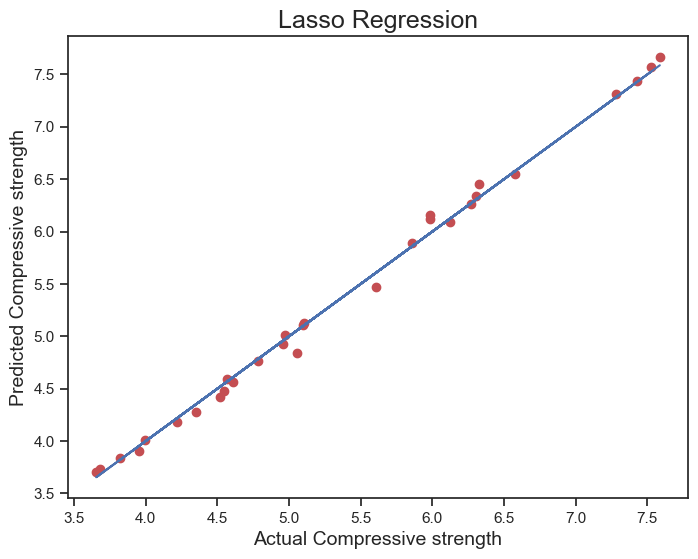

In [50]:
# Plotting for Lasso

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Lasso Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

We can see that all the data points are on the best fit line and therefore we can say that this is an excellent dataset as all the datapoints are best fitted here

In [51]:
# Calculating MAE,MSE and RMSE for Lasso

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [52]:
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))

Mean Absolute Error:  0.058178137838750685
Mean Squared Error:  0.005998305694469238
Root Mean Squared Error:  0.07744872945677829


### hyperparameter tuning

#### Ridge

In [61]:
from sklearn.linear_model import Ridge
import numpy as np
parameters=parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [63]:
# Using the best parameters in rd

rd=Ridge(alpha=1,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rds=r2_score(y_test,pred_rd)
print('r2_score: ',rds*100)

rdscore=cross_val_score(rd,x,y,cv=3)
rdc=rdscore.mean()
print('Cross val score: ',rdc*100)

r2_score:  99.57324878774287
Cross val score:  93.71417123137967


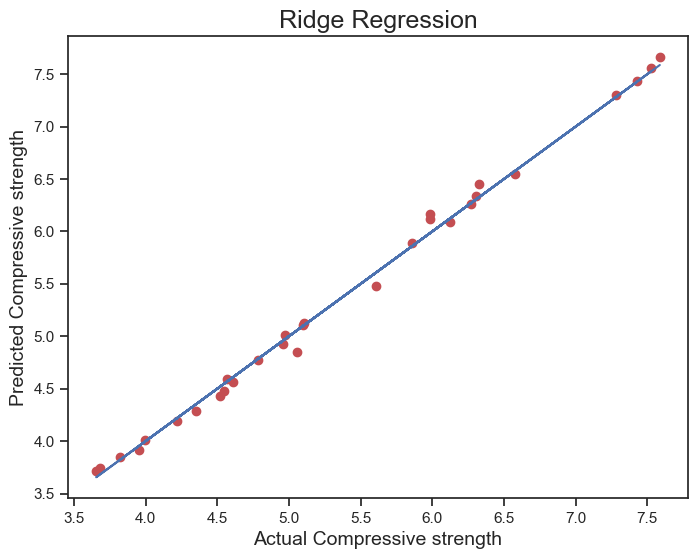

In [64]:
# Plotting for Ridge

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.title('Ridge Regression',fontsize=18)
plt.xlabel('Actual Compressive strength',fontsize=14)
plt.ylabel('Predicted Compressive strength',fontsize=14)
plt.show()

In [65]:
# Calculation MAE,MSE and RMSE for Ridge

print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))

Mean Absolute Error:  0.05742291269236795
Mean Squared Error:  0.005842026917773487
Root Mean Squared Error:  0.07643315326331557


We can see that all the data points are either on the best fit line or near to the best fit line. Therefore, we can say that all the datas are very good in the dataset and they all are bestfitted.

#### Conclusion

The given dataset is an excellent dataset for predicting the happiness score value from the given datas and columns. Best performing model is Gradient Boost Regressor Algorithm and nearly all of the data points are bestfitted in both Lasso(L1) and Ridge(L2) Regularization graph.

### Saving model

In [67]:
import joblib
joblib.dump(gbr,'HappinessReportProject.pkl')

['HappinessReportProject.pkl']